In [1]:
using JSON
using CairoMakie

include("../../Modules/TestingFunctions.jl")
using .TestingFunctions

# Testing number of steps

In [2]:
ON_layered_test_search = Dict(
    "prediction_type" => "single_step",
    "testing_params" => Dict(
        "mask_states_b4_readout" => false,
        "stochastic" => false,
        "stochastic_rescale_V_rec" => false,
        "readout_switching" => false
    ),
    "data" => "Lorenz 0_01",
    "testing_parameter" => "n_steps",
    "ignore_first" => 100,
    "trials" => 30,
    "total_k" => 288#468
)
ON_layered_tests = find_test(ON_layered_test_search)

3-element Vector{Any}:
 Dict{String, Any}("prediction_type" => "single_step", "testing_params" => Dict{String, Any}("stochastic" => false, "mask_states_b4_readout" => false, "stochastic_rescale_V_rec" => false, "readout_switching" => false), "data" => "Lorenz 0_01", "num_partitions" => 1, "error_funcs" => Any["RMSE", "turning_partition_RMSE"], "testing_parameter" => "n_steps", "measurements" => Dict{String, Any}("RMSE" => Dict{String, Any}("minimum" => Any[0.0026074349260055696, 0.0076389050708701185, 0.014080473297868611, 0.03126807173602731, 0.09159744265408268, 0.4588831042274206, 1.266279110877719, 2.9323398053223997, 4.4785445045211745, 4.885461761546504, 5.612813006238983], "median" => Any[0.0034547289345868946, 0.009403729668309744, 0.018829297480332168, 0.04184237695235196, 0.13099790935541294, 0.6472720581885041, 1.5358288290496793, 3.3307056353673907, 4.75618931435354, 4.973890902119457, 5.7512344066975825], "mean" => Any[0.0034337206844815343, 0.009496460274061126, 0.0187755

In [3]:
test_dict = Dict()

for test in ON_layered_tests
    # if !(test["m"] in [1, 2, 3])
    #     continue
    # end
    test_dict["m = " * string(test["m"])] = test
end


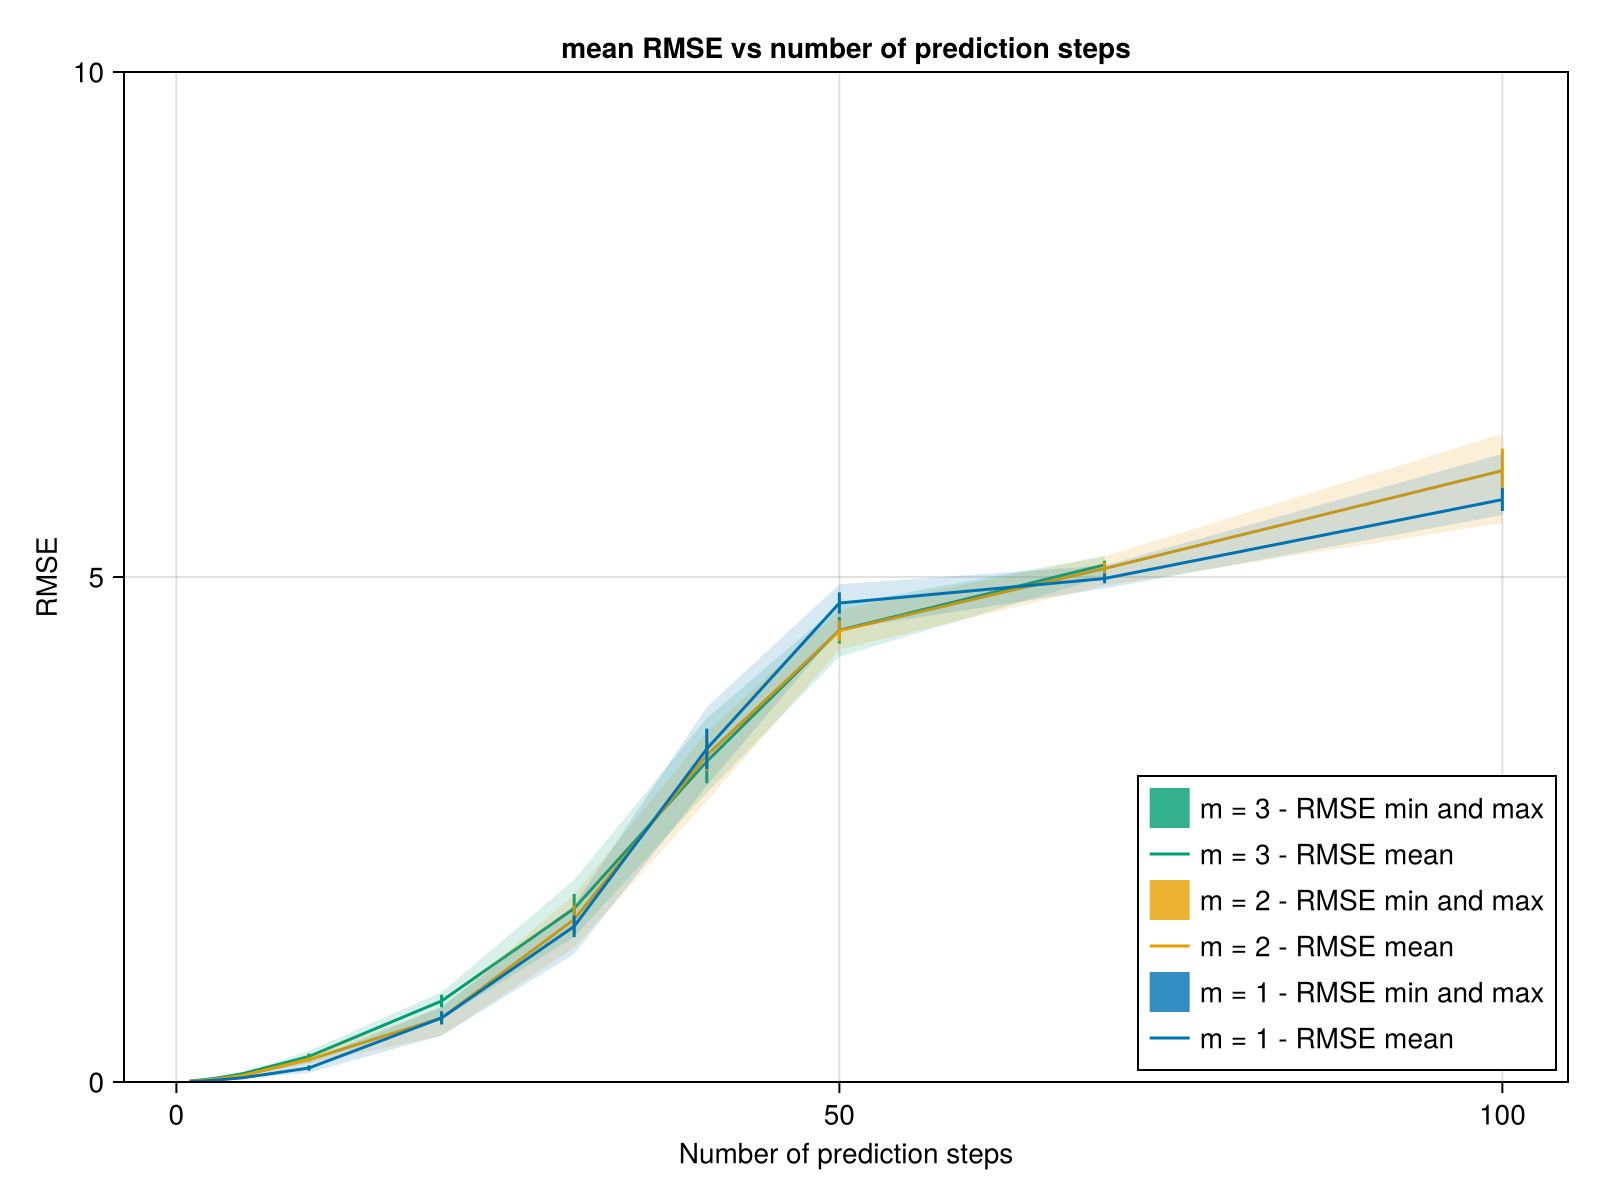

In [4]:
fig = chart_tests(
    "mean RMSE vs number of prediction steps",
    "Number of prediction steps",
    "RMSE",
    test_dict,
    error_funcs=["RMSE"],
    aggregation_funcs=["range", "mean", "std"],
    ylim_low=0,
    ylim_high=10
)

CairoMakie.save("readout_switching_rmse_vs_steps.pdf", fig)

fig

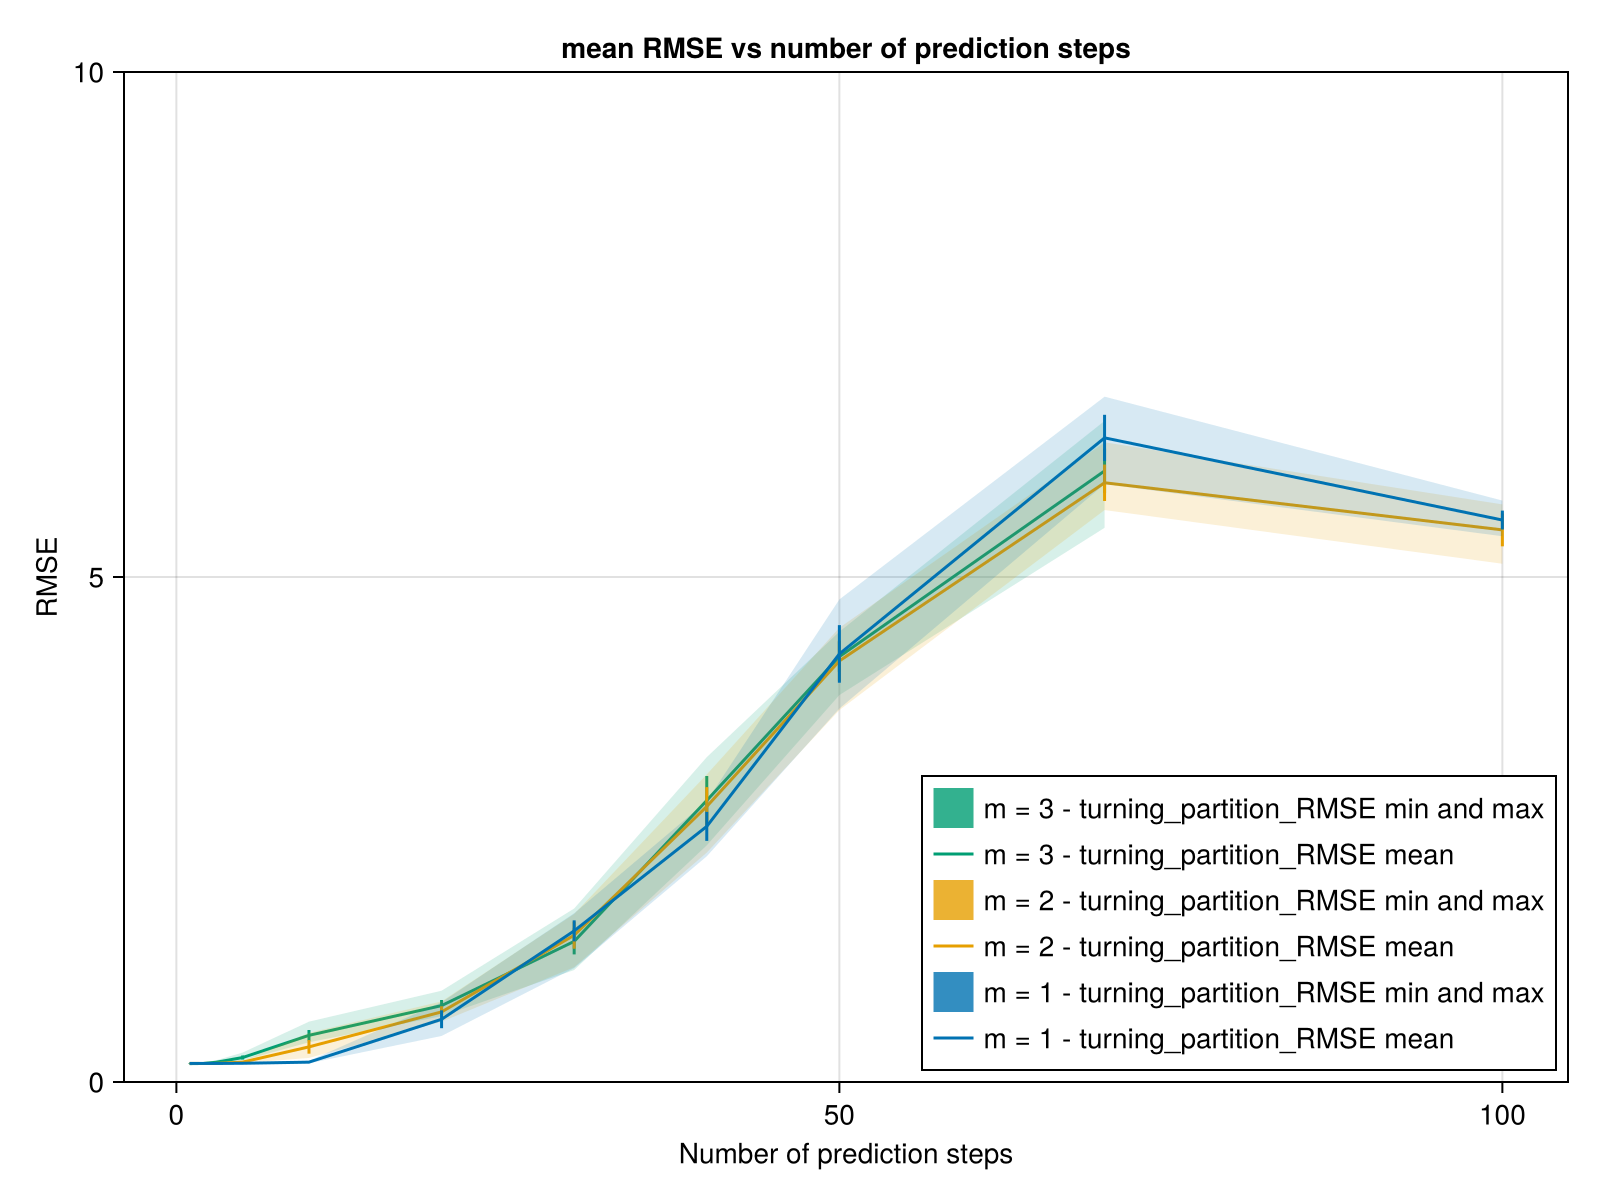

In [5]:
fig = chart_tests(
    "mean RMSE vs number of prediction steps",
    "Number of prediction steps",
    "RMSE",
    test_dict,
    error_funcs=["turning_partition_RMSE"],
    aggregation_funcs=["range", "mean", "std"],
    ylim_low=0,
    ylim_high=10
)

CairoMakie.save("readout_switching_rmse_vs_steps.pdf", fig)

fig